In [1]:
import zipfile

DATA_IN_PATH = './data_in/'

file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

파일 크기 : 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB
전체 학습데이터의 개수: 404290
교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, '# of questions')

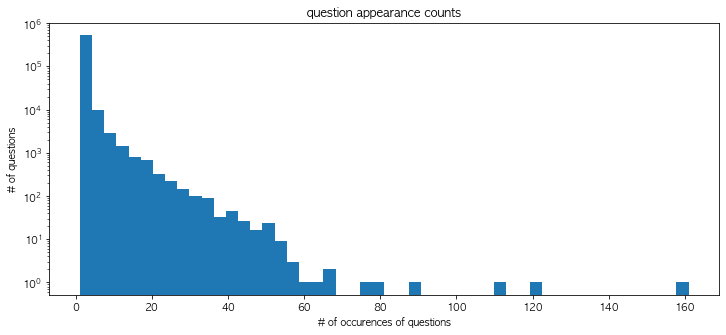

In [2]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50)
plt.yscale('log')
plt.title('question appearance counts')
plt.xlabel('# of occurences of questions')
plt.ylabel('# of questions')

In [9]:
print('중복 최대 개수: %d' % np.max(train_set.value_counts()))
print('중복 최소 개수: %d' % np.min(train_set.value_counts()))
print('평균: %f' % np.mean(train_set.value_counts()))
print('표준편차: %f' % np.std(train_set.value_counts()))
print('중간값: %d' % np.median(train_set.value_counts()))
print('1사분면: %f' % np.percentile(train_set.value_counts(), 25))
print('3사분면: %f' % np.percentile(train_set.value_counts(), 75))

중복 최대 개수: 161
중복 최소 개수: 1
평균: 1.504724
표준편차: 1.911437
중간값: 1
1사분면: 1.000000
3사분면: 1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x126ddd490>,
 'caps': [<matplotlib.lines.Line2D at 0x1271fd490>,
 'boxes': [<matplotlib.lines.Line2D at 0x126dbacd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1271fd790>],
 'fliers': [<matplotlib.lines.Line2D at 0x126de10d0>],
 'means': []}

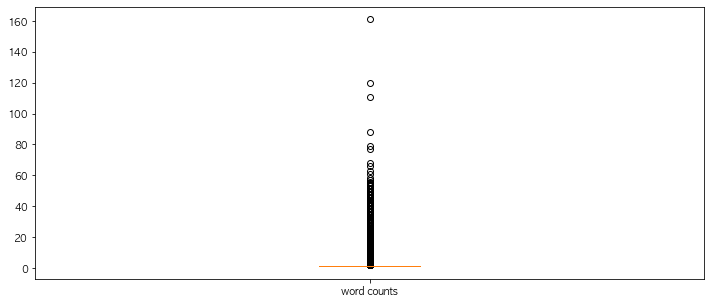

In [17]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()], labels=['word counts'])

(-0.5, 799.5, 599.5, -0.5)

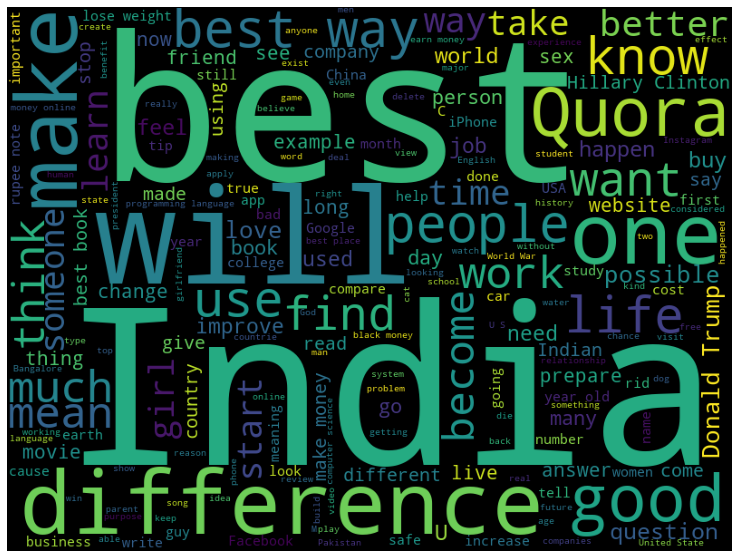

In [18]:
from wordcloud import WordCloud as wc
cloud = wc(width=800, height=600).generate(" ".join(train_set.astype('str')))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

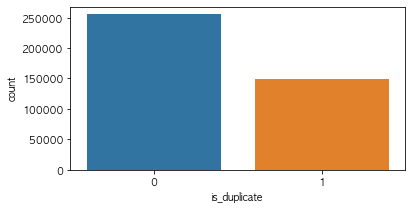

In [19]:
fig, axe = plt.subplots()
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

In [24]:
# character 단위로 먼저 분석
train_length = train_set.apply(len)

Text(0, 0.5, 'probalility')

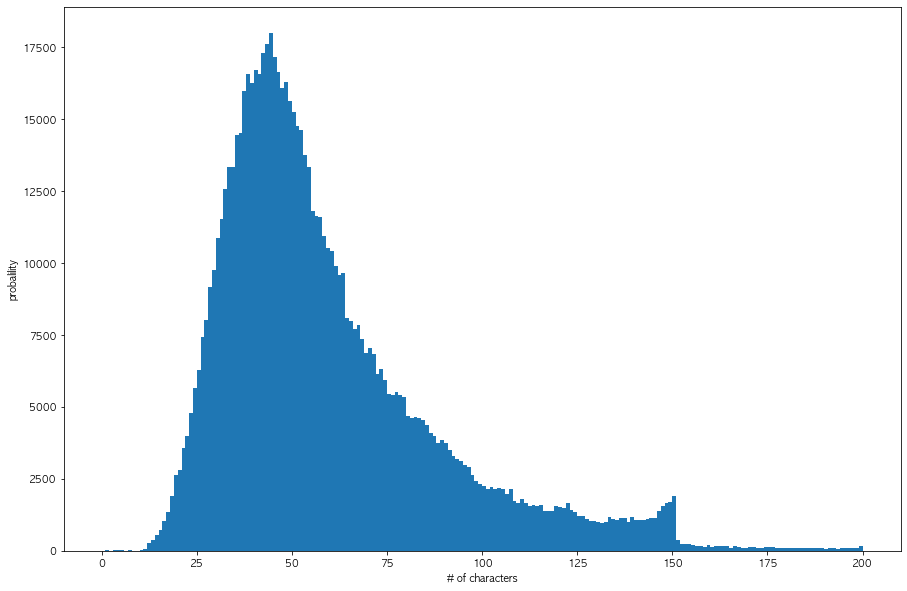

In [23]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], label=['train'])
plt.xlabel('# of characters')
plt.ylabel('probalility')

In [29]:
print('중복 최대 개수: %d' % np.max(train_length))
print('중복 최소 개수: %d' % np.min(train_length))
print('평균: %f' % np.mean(train_length))
print('표준편차: %f' % np.std(train_length))
print('중간값: %d' % np.median(train_length))
print('1사분면: %f' % np.percentile(train_length, 25))
print('3사분면: %f' % np.percentile(train_length, 75))

중복 최대 개수: 1169
중복 최소 개수: 1
평균: 59.822548
표준편차: 31.963732
중간값: 51
1사분면: 39.000000
3사분면: 72.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1286a2110>,
 'caps': [<matplotlib.lines.Line2D at 0x1286a2910>,
 'boxes': [<matplotlib.lines.Line2D at 0x127269e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1286a5a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1286a5350>],
 'means': []}

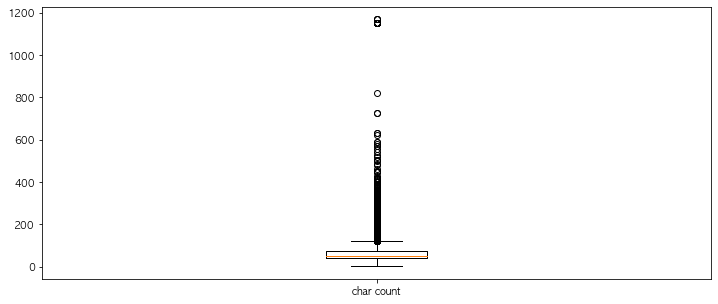

In [32]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char count'])

In [33]:
train_word_counts = train_set.apply(lambda x: len(x.split(" ")))

Text(0.5, 1.0, '# of words in questions')

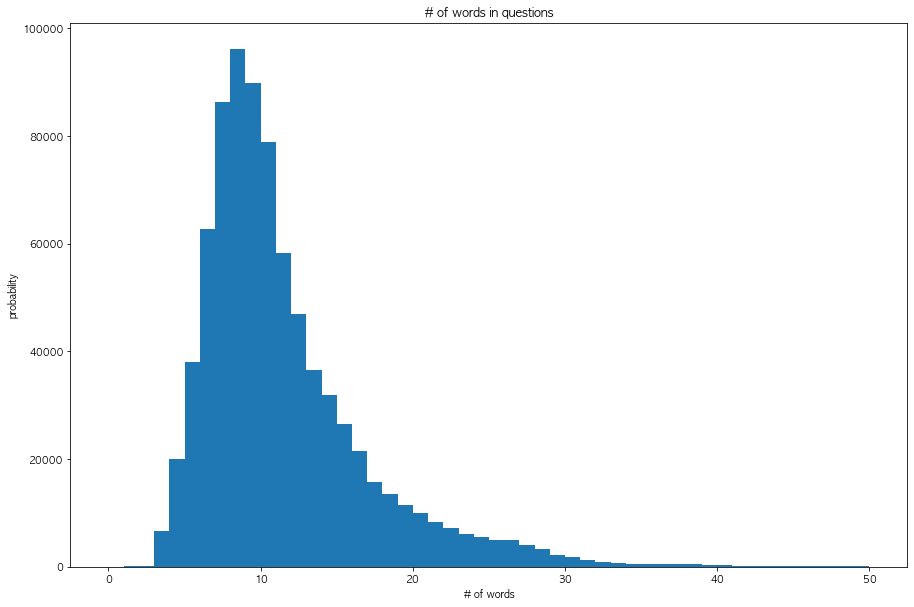

In [39]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50])
plt.xlabel('# of words')
plt.ylabel('probability')
plt.title('# of words in questions')

In [40]:
print('중복 최대 개수: %d' % np.max(train_word_counts))
print('중복 최소 개수: %d' % np.min(train_word_counts))
print('평균: %f' % np.mean(train_word_counts))
print('표준편차: %f' % np.std(train_word_counts))
print('중간값: %d' % np.median(train_word_counts))
print('1사분면: %f' % np.percentile(train_word_counts, 25))
print('3사분면: %f' % np.percentile(train_word_counts, 75))

중복 최대 개수: 237
중복 최소 개수: 1
평균: 11.064856
표준편차: 5.889164
중간값: 10
1사분면: 7.000000
3사분면: 13.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1558bd690>,
 'caps': [<matplotlib.lines.Line2D at 0x1558b3210>,
 'boxes': [<matplotlib.lines.Line2D at 0x1558bd110>],
 'medians': [<matplotlib.lines.Line2D at 0x1558b3cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1558ad0d0>],
 'means': []}

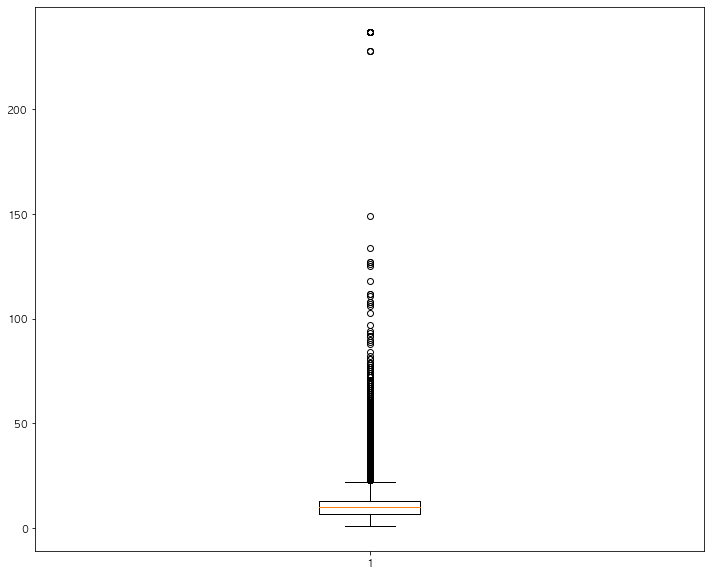

In [41]:
plt.figure(figsize=(12, 10))
plt.boxplot(train_word_counts)

In [51]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capital = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

ValueError: incomplete format

In [58]:
print('물음표: {:f}%'.format(qmarks*100))
print("수식: {:f}%".format(math*100))
print("온점: {:f}%".format(fullstop*100))
print("대문자 시작: {:f}%".format(capital_first*100))
print("대문자 유무: {:f}%".format(capital*100))
print("숫자 유무: {:f}%".format(numbers*100))

물음표: 99.873853%
수식: 0.117366%
온점: 6.308219%
대문자 시작: 99.813253%
대문자 유무: 99.950531%
숫자 유무: 11.827154%


## 데이터 전처리

In [59]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [61]:
data_in = './data_in/'
filters = "([~.,!?\"':;])"
max_sequence_length = 31

change_filter = re.compile(filters)

In [63]:
train_data = pd.read_csv(data_in+'train.csv', encoding='utf-8')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### 비율 맞추기

In [75]:
train_pos_data = train_data.loc[train_data['is_duplicate']==1]
train_neg_data = train_data.loc[train_data['is_duplicate']==0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

In [76]:
train_neg_data= train_neg_data.sample(frac=sample_frac)

In [77]:
print(len(train_pos_data))
print(len(train_neg_data))

149263
149263


In [78]:
train_data = pd.concat([train_pos_data, train_neg_data])

### 문장 문자열에 대한 전처리

In [80]:
q1 = [str(s) for s in train_data['question1']]
q2 = [str(s) for s in train_data['question2']]

filtered_q1 = list()
filtered_q2 = list()

for q in q1:
    filtered_q1.append(re.sub(change_filter, "", q).lower())
    
for q in q2:
    filtered_q2.append(re.sub(change_filter, "", q).lower())

### 문자열 토크나이징

In [82]:
tokenizer = Tokenizer()

# 토크나이저 객체는 합쳐서 만들기
tokenizer.fit_on_texts(filtered_q1 + filtered_q2)

# 토크나이징은 따로 수행하기
q1_seq = tokenizer.texts_to_sequences(filtered_q1)
q2_seq = tokenizer.texts_to_sequences(filtered_q2)

In [83]:
q1_data = pad_sequences(q1_seq, maxlen=max_sequence_length, padding='post')
q2_data = pad_sequences(q2_seq, maxlen=max_sequence_length, padding='post')

In [84]:
# 라벨값과 단어 사전 저장
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

In [85]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [86]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

#### test

In [90]:
test_data = pd.read_csv(data_in+'test.csv', encoding='utf-8')
valid_ids = [type(x) == int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()

/Users/hbae/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
test_q1 = [str(s) for s in test_data['question1']]
test_q2 = [str(s) for s in test_data['question2']]

filtered_test_q1 = list()
filtered_test_q2 = list()

for q in test_q1:
    filtered_test_q1.append(re.sub(change_filter, "", q).lower())
    
for q in test_q2:
    filtered_test_q2.append(re.sub(change_filter, "", q).lower())

In [92]:
tokenizer = Tokenizer()

# 토크나이저 객체는 합쳐서 만들기
tokenizer.fit_on_texts(filtered_test_q1 + filtered_test_q2)

# 토크나이징은 따로 수행하기
test_q1_seq = tokenizer.texts_to_sequences(filtered_test_q1)
test_q2_seq = tokenizer.texts_to_sequences(filtered_test_q2)

In [93]:
test_q1_data = pad_sequences(test_q1_seq, maxlen=max_sequence_length, padding='post')
test_q2_data = pad_sequences(test_q2_seq, maxlen=max_sequence_length, padding='post')

In [95]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_LABEL_DATA = 'test_label.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA , 'wb'), labels)